# TDI Milestone Action Items

### Pandas/Numpy Action Items

Call packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Import data

In [ ]:
path = 'C:/Users/Kathleen/Documents/GitWorkspace/binder-framework/'
ecdata = pd.read_csv(path + 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_20231207.csv')

Explore the data

In [ ]:
ecdata.info()

Explore the data (part 2)

In [ ]:
summary = ecdata.describe()

#### 1. How many different companies are represented in the data set?

In [ ]:
len(set(ecdata["Company Name"])) 

#### 2. What is the total number of jobs created for businesses in Queens? 

Answered in two different ways, using groupby and using filtering with loc. 

In [ ]:
ecdata.groupby(["Borough"]).get_group("QUEENS")["Job created"].sum()

In [ ]:
ecdata.loc[ecdata["Borough"] == "QUEENS", ["Job created"]].sum()

#### 3. How many different unique email domains names are there in the data set?

find the email data

In [ ]:
ecdata.columns
ecdata.info()

make a function to convert strings to lower (not all values are strings, some are na)

In [ ]:
def ifstringlower(datapoint): 
    if isinstance(datapoint, str):
        return datapoint.lower()
    else:
        return datapoint

apply the function 

In [ ]:
ecdata["company email"] = ecdata["company email"].apply(ifstringlower) 

separate the series into its own object

In [ ]:
emails = ecdata["company email"] 

use split to parse on the @ sign into two columns 

In [ ]:
emails_split = emails.str.split('@', n=1, expand = True).rename(columns = {0: "user", 1: "domain"})
emails_split.head()

count unique values 

In [ ]:
emails_split["domain"].dropna().nunique() #the pandas way is nunique


In [ ]:
len(set(emails_split["domain"].dropna())) #double check  with the set method. 


#### 4 Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?



Make col name easier to work with 

In [ ]:
ecdata.rename(columns={"Neighborhood Tabulation Area (NTA) (2020)" : "NTA"}, inplace=True)
ecdata.columns

count businesses by NTA

In [ ]:
ntacounts = ecdata["NTA"].value_counts()
ntacounts

sum jobs created 

In [ ]:
jobsum = ecdata[["Job created", "NTA"]].groupby(["NTA"]).sum() 

create a new column, mean savings

In [ ]:
meansaved = ecdata[["Total Savings", "NTA"]].groupby(["NTA"]).mean()

concatenate (cbind) my 3 series into a new data table

In [ ]:
summary = pd.concat([ntacounts, meansaved, jobsum], axis = 1)

output #filter with loc 

In [ ]:
output = summary.loc[summary["count"] >= 5, ['count', 'Job created', 'Total Savings']]

export the results

In [ ]:
path = 'C:/Users/Kathleen/Documents/GitWorkspace/binder-framework/'
output.to_csv(path+'day4milestone.csv')

### Plotting  Milestone action items 

Call packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, RRuleLocator, drange,
                              rrulewrapper)

Import data

In [2]:
path = 'C:/Users/Kathleen/Documents/Boot Camp/12 day/practice files/'
ecdata = pd.read_csv(path + 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_20231207.csv')

peruse the data 

In [3]:
summary = ecdata.describe()
summary

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Gas Savings,Cogen savings,Electric Savings,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020)
count,2363.000000,2350.000000,229.000000,339.000000,2.363000e+03,2.363000e+03,801.000000,801.000000,8.010000e+02,2144.000000,2144.000000,2144.000000,2144.000000,2.111000e+03,2.111000e+03,2144.000000
mean,11117.511215,111.891064,66.733624,135.035398,3.586161e+04,3.670538e+05,1556.253458,775.068964,2.971005e+04,40.724748,-73.938047,319.817631,27.615205,3.303459e+06,3.173351e+09,8139.259328
std,2227.676611,477.751105,749.200494,371.523489,1.501716e+05,1.668895e+06,9690.273878,10073.585193,1.133967e+05,0.058004,0.066153,92.695266,10.715503,9.796819e+05,9.367395e+08,15674.506202
min,10001.000000,0.000000,1.000000,1.000000,-1.099101e+05,0.000000e+00,-16353.890000,0.000000,-4.867951e+04,40.537235,-74.230740,101.000000,1.000000,1.000006e+06,1.000058e+09,2.000000
25%,11101.000000,10.000000,4.000000,14.000000,1.761375e+03,1.854265e+04,0.000000,0.000000,1.461500e+03,40.676734,-73.976013,301.000000,22.000000,3.008798e+06,3.006120e+09,286.000000
50%,11205.000000,27.500000,10.000000,36.000000,6.192290e+03,5.831049e+04,0.000000,0.000000,5.832510e+03,40.726669,-73.937847,307.000000,27.000000,3.336906e+06,3.038820e+09,974.500000
75%,11232.000000,70.000000,15.000000,84.000000,1.962452e+04,1.827293e+05,0.000000,0.000000,1.791193e+04,40.753900,-73.906823,402.000000,35.250000,4.005214e+06,4.004160e+09,9302.000000
max,91331.000000,15898.000000,11343.000000,2964.000000,3.998240e+06,3.355135e+07,162239.120000,210858.000000,2.210101e+06,40.900509,-73.722866,503.000000,51.000000,5.168823e+06,5.073280e+09,152902.000000


peruse the data 2

In [4]:
ecdata.columns

Index(['Period', 'Company Name', 'company contact', 'company email',
       'company phone', 'Address', 'City', 'State', 'Postcode', 'Industry',
       'Industry descr', 'Company Type', 'Current fulltime', 'Job created',
       'Job retain', 'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Gas Savings',
       'Cogen savings', 'Electric Savings', 'Borough', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'BIN', 'BBL',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object')

#### 1. Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

Text(0, 0.5, 'Total savings (by biz)')

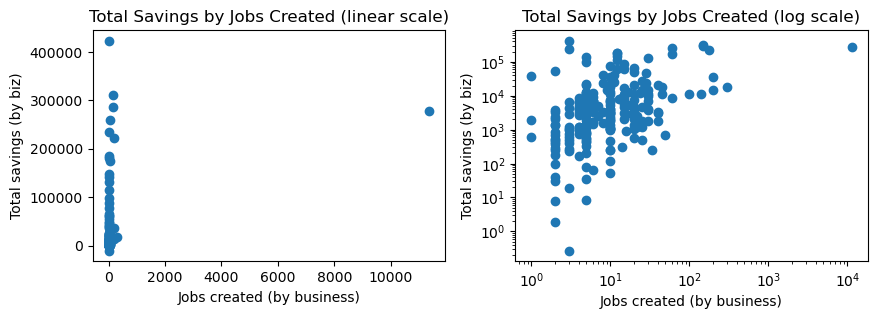

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
ax1.scatter(ecdata['Job created'], ecdata['Total Savings'])
ax1.set_title('Total Savings by Jobs Created (linear scale)')
ax1.set_xlabel('Jobs created (by business)')
ax1.set_ylabel('Total savings (by biz)')
ax2.scatter(ecdata['Job created'], ecdata['Total Savings'])
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Total Savings by Jobs Created (log scale)')
ax2.set_xlabel('Jobs created (by business)')
ax2.set_ylabel('Total savings (by biz)')

#### 2 histogram of the log of the total savings 

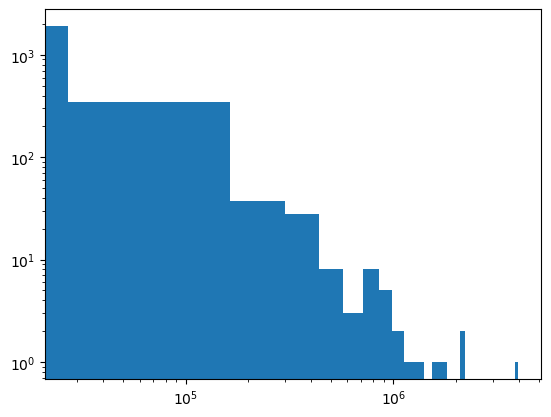

In [6]:
ecdata['Total Savings'].describe()
fig, ax = plt.subplots()
ax.hist(ecdata['Total Savings'], bins = 30)
ax.set_xscale('log')
ax.set_yscale('log')

#The actual text was to make a "histogram of the log of the total AVERAGE savings" but the average of the total savings column would be a sinle data point, and there for not histogramable.  

#### 3 line plot of the total jobs created for each month.

Steps: 
convert the "effective date" column into an actual posixct / datetime variable 
group data by month 
graph the summary 

Effective Date
07/03/2013    31
03/07/2006    27
07/06/2015    20
05/15/2015    20
07/08/2015    20
              ..
04/06/2001     1
04/15/2009     1
03/08/2007     1
10/04/2004     1
05/03/2022     1
Name: count, Length: 619, dtype: int64

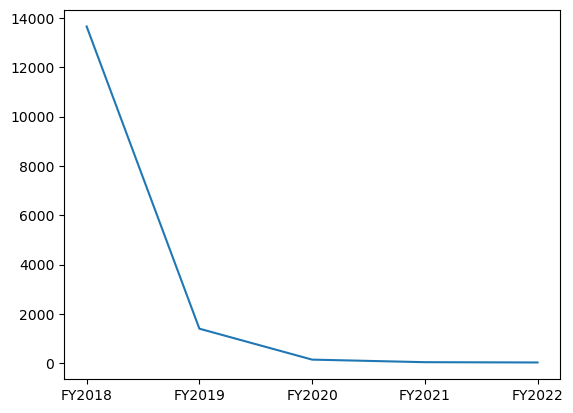

In [7]:
summary = ecdata.groupby(["Period"])["Job created"].sum()
fig, ax1 = plt.subplots()
ax1.plot(summary.index, summary)
summary.index
ecdata['Effective Date'].value_counts()

create a datetime variable

In [8]:
ecdata["Effective Date"].head(20)
ecdata["effdate"] = pd.to_datetime(ecdata['Effective Date'], dayfirst=False)
ecdata.info() #see that the new variable has been added 
ecdata["effdate"].head(20) #preview the new variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Period                                     2363 non-null   object        
 1   Company Name                               2363 non-null   object        
 2   company contact                            2363 non-null   object        
 3   company email                              2234 non-null   object        
 4   company phone                              2360 non-null   object        
 5   Address                                    2363 non-null   object        
 6   City                                       2357 non-null   object        
 7   State                                      2363 non-null   object        
 8   Postcode                                   2363 non-null   int64         
 9   Industry           

0    2008-04-07
1    2009-12-08
2    2011-03-04
3    2015-11-06
4    2009-01-07
5    2004-12-14
6    2004-09-08
7    2008-06-16
8    2009-04-08
9    2005-03-19
10   2008-04-09
11   2010-06-07
12   2011-09-19
13   2005-10-05
14   2004-07-02
15   2015-07-06
16   2008-06-30
17   2012-05-11
18   2012-12-24
19   2008-06-06
Name: effdate, dtype: datetime64[ns]

group the savings from each month

In [9]:
monthsavings = ecdata.groupby(pd.Grouper(key="effdate", freq="1M"))["Total Savings"].sum()


graph the result 

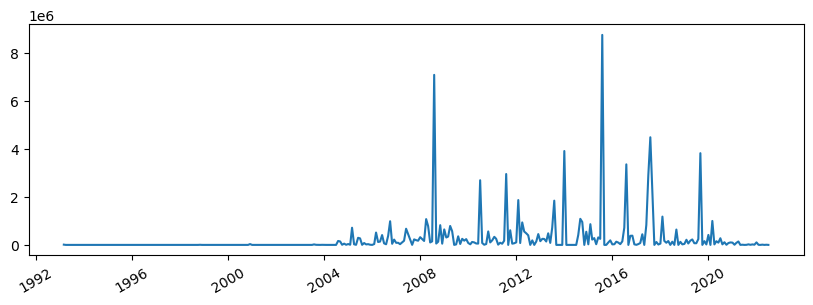

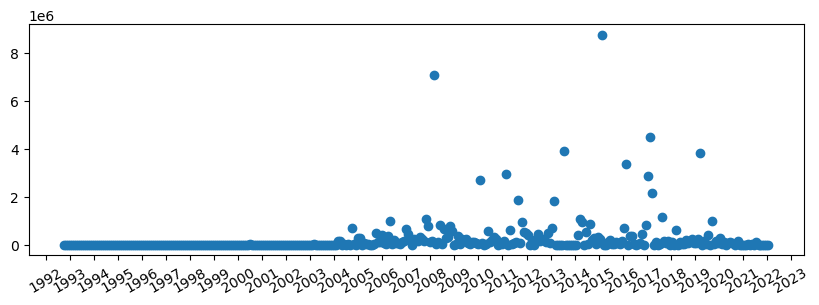

In [10]:
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(monthsavings.index, monthsavings) 
ax.xaxis.set_tick_params(rotation=30, labelsize =10)
#This is actually works! graphs values by months, labels by years! But here we go... 
rule = rrulewrapper(YEARLY)
loc = RRuleLocator(rule)
formatter=DateFormatter('%Y')

fig, ax = plt.subplots(figsize = (10, 3))
plt.plot(monthsavings.index, monthsavings, 'o') 
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize =10)

alternate approach: plot by month, cyclically over all years

group the data

In [ ]:
ecdata.groupby(ecdata['effdate'].dt.month)["Total Savings"].sum()
monthsum = ecdata.groupby(ecdata['effdate'].dt.month)["Total Savings"].sum()

plot the data

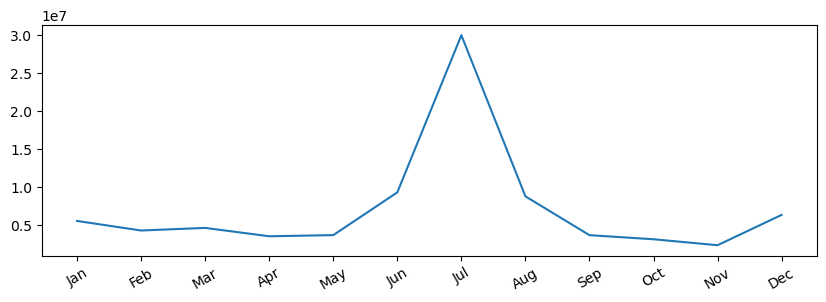

In [12]:
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(monthsum.index, monthsum) 
ax.set_xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.xaxis.set_tick_params(rotation=30, labelsize =10)
#cyclical - shows most savings are reported at end of fiscal year.